In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df=pd.read_excel(r"C:\Users\aksha\Downloads\Airlines+Data (1).xlsx",parse_dates=True,index_col='Month')

In [3]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


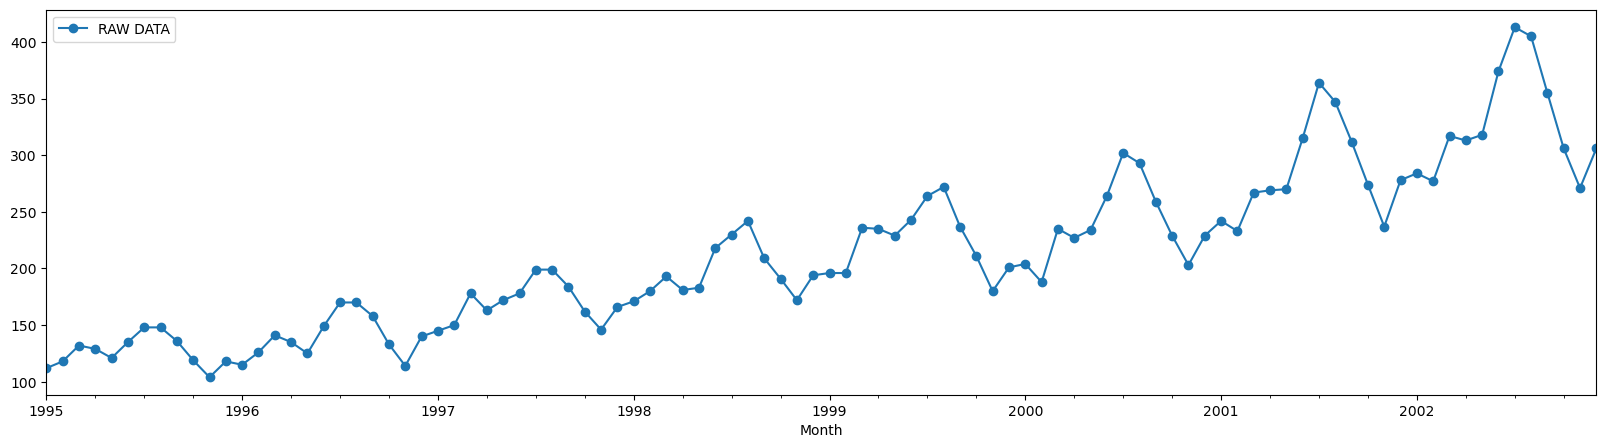

In [4]:
plt.figure(figsize=(20,5))
df['Passengers'].plot(label='RAW DATA',marker='o')
plt.legend()

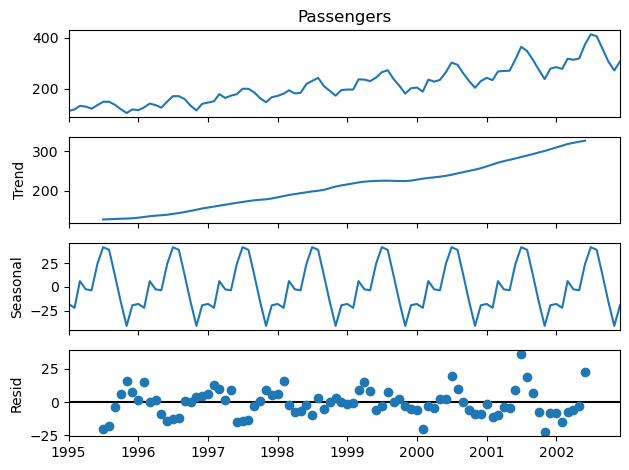

In [5]:
seasonal_decompose(df['Passengers'],period=12).plot()
plt.show()

In [6]:
from pmdarima import auto_arima

In [8]:
stepwise=auto_arima(df['Passengers'],start_p=1,start_q=1,max_p=3,max_q=3,m=12,start_P=0,seasonal=True,d=None,D=1,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
stepwise.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=618.049, Time=0.34 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=622.012, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=615.965, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=616.628, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=618.192, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=617.814, Time=0.20 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=617.881, Time=0.36 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=616.531, Time=0.15 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.16 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=618.221, Time=0.06 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=617.862, Time=0.11 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=617.462, Time=0.16 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=616.076, Time=0.12 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=619.394, Time=0.55 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -304.983
Date:                            Mon, 13 May 2024   AIC                            615.965
Time:                                    10:15:00   BIC                            623.222
Sample:                                01-01-1995   HQIC                           618.881
                                     - 12-01-2002                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2250      0.099     -2.276      0.023      -0.419      -0.031
ar.S.L12      -0.2274      0.089     -2.548      0.011      -0.402      -0.052
sigma2        90.2700     14.667      6.155      0.000      61.524     119.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.97   Prob(JB):                         0.33
Heteroskedasticity (H):               1.77   Skew:                             0.39
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
len(df)

96

In [12]:
96*3/4

72.0

In [28]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [77]:
train=df.iloc[:72,:]

In [78]:
train

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2000-08-01,293
2000-09-01,259
2000-10-01,229


In [79]:
test=df.iloc[72:,:]

In [80]:
len(test)

24

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [102]:
model=SARIMAX(train['Passengers'],order=(1,1,0),seasonal_order=(2,1,0,12))
result=model.fit()
result.summary()

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   72
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -214.949
Date:                            Mon, 13 May 2024   AIC                            437.897
Time:                                    10:39:07   BIC                            446.208
Sample:                                01-01-1995   HQIC                           441.141
                                     - 12-01-2000                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3215      0.118     -2.727      0.006      -0.553      -0.090
ar.S.L12      -0.4036      0.193     -2.095      0.036      -0.781      -0.026
ar.S.L24       0.0572      0.260      0.220      0.826      -0.451       0.566
sigma2        81.7928     14.807      5.524      0.000      52.772     110.813
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.95   Prob(JB):                         0.48
Heteroskedasticity (H):               2.20   Skew:                             0.39
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [103]:
start=len(train)
end=len(train)+len(test)-1

In [104]:
prdt=result.predict(start,end,type='levels')

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [105]:
prdt

2001-01-01    229.984066
2001-02-01    220.390241
2001-03-01    265.959402
2001-04-01    261.461062
2001-05-01    262.741839
2001-06-01    285.089194
2001-07-01    316.741053
2001-08-01    314.373886
2001-09-01    279.855829
2001-10-01    251.012986
2001-11-01    222.309196
2001-12-01    246.234124
2002-01-01    248.088942
2002-02-01    234.995217
2002-03-01    281.541922
2002-04-01    275.230286
2002-05-01    279.562258
2002-06-01    305.912570
2002-07-01    341.098063
2002-08-01    335.082365
2002-09-01    300.830542
2002-10-01    271.292072
2002-11-01    243.965260
2002-12-01    269.013427
Freq: MS, Name: predicted_mean, dtype: float64

In [106]:
test['Passengers']

Month
2001-01-01    242
2001-02-01    233
2001-03-01    267
2001-04-01    269
2001-05-01    270
2001-06-01    315
2001-07-01    364
2001-08-01    347
2001-09-01    312
2001-10-01    274
2001-11-01    237
2001-12-01    278
2002-01-01    284
2002-02-01    277
2002-03-01    317
2002-04-01    313
2002-05-01    318
2002-06-01    374
2002-07-01    413
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, dtype: int64

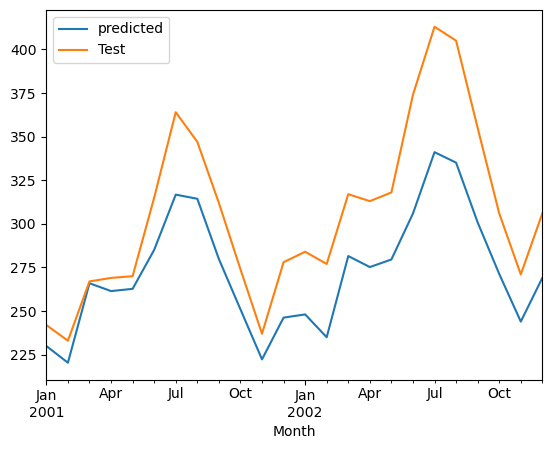

In [107]:
prdt.plot(label='predicted')
test['Passengers'].plot(label='Test')
plt.legend()

In [108]:
from sklearn.metrics import mean_squared_error

In [109]:
mean_squared_error(test['Passengers'],prdt)

1480.852747599439

In [110]:
np.sqrt(mean_squared_error(test['Passengers'],prdt))

38.481849586518564

In [111]:
model2=SARIMAX(train['Passengers'],order=(0,1,1),seasonal_order=(2,1,0,12))
result2=model.fit()
result2.summary()

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   72
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -214.949
Date:                            Mon, 13 May 2024   AIC                            437.897
Time:                                    10:39:13   BIC                            446.208
Sample:                                01-01-1995   HQIC                           441.141
                                     - 12-01-2000                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3215      0.118     -2.727      0.006      -0.553      -0.090
ar.S.L12      -0.4036      0.193     -2.095      0.036      -0.781      -0.026
ar.S.L24       0.0572      0.260      0.220      0.826      -0.451       0.566
sigma2        81.7928     14.807      5.524      0.000      52.772     110.813
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.95   Prob(JB):                         0.48
Heteroskedasticity (H):               2.20   Skew:                             0.39
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [112]:
prdt2=result2.predict(start,end,type='levels')

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [113]:
mean_squared_error(test['Passengers'],prdt2)

1480.852747599439

In [114]:
np.sqrt(mean_squared_error(test['Passengers'],prdt2))

38.481849586518564